STATIONARY

In [3]:
%matplotlib inline

iteration :  0
iteration :  100
iteration :  200
iteration :  300
iteration :  400
iteration :  500
iteration :  600
iteration :  700
iteration :  800
iteration :  900
iteration :  1000
iteration :  1100
iteration :  1200
iteration :  1300
iteration :  1400
iteration :  1500
iteration :  1600
iteration :  1700
iteration :  1800
iteration :  1900
iteration :  0
iteration :  100
iteration :  200
iteration :  300
iteration :  400
iteration :  500
iteration :  600
iteration :  700
iteration :  800
iteration :  900
iteration :  1000
iteration :  1100
iteration :  1200
iteration :  1300
iteration :  1400
iteration :  1500
iteration :  1600
iteration :  1700
iteration :  1800
iteration :  1900


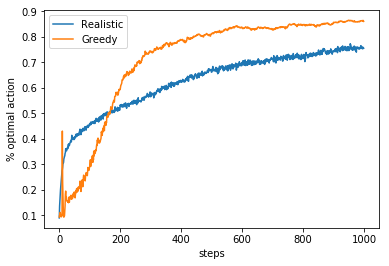

In [4]:
import numpy as np
import matplotlib.pyplot as plt

num_arms = 10
# fig, axs = plt.subplots(2)

def run_real(q_t, epsilon, episodes):
    optimal_actions = np.argmax(q_t)
    action_counts = np.zeros(num_arms)
    q_pred = np.zeros(num_arms)

    episode_rewards = []
    q_true = q_t
    opt_action_cnt = []
    for eps in range(episodes):
        
        if np.random.random() < epsilon:
            action_index = np.random.randint(num_arms)
        else:
            greedy = np.argmax(q_pred)
            actions = np.where(q_pred == np.argmax(q_pred))[0]
            
            if len(actions) == 0:
                action_index = greedy
            else:
                action_index = np.random.choice(actions)
        if epsilon == 0:
            action_index = np.argmax(q_pred)
        if action_index == optimal_actions:
            opt_action_cnt.append(1)
        else:opt_action_cnt.append(0)
        reward = np.random.normal(q_true[action_index])
        
        action_counts[action_index] += 1
#         alpha = 1 / action_counts[action_index]
        alpha = 0.1
        q_pred[action_index] = q_pred[action_index] +\
                        alpha * (reward-q_pred[action_index])
        
        episode_rewards.append(reward)
        # q_true += np.random.normal(0.0, 0.01, num_arms)
    return episode_rewards, opt_action_cnt

def run_greedy(q_t, episodes):
    optimal_actions = np.argmax(q_t)
    action_counts = np.zeros(num_arms)
    q_pred = np.zeros(num_arms) + 5.

    episode_rewards = []
    q_true = q_t
    opt_action_cnt = []
    for eps in range(episodes):
    
     
        action_index = np.argmax(q_pred)
        if action_index == optimal_actions:
            opt_action_cnt.append(1)
        else:opt_action_cnt.append(0)
        reward = np.random.normal(q_true[action_index])
        
        action_counts[action_index] += 1
#         alpha = 1 / action_counts[action_index]
        alpha = 0.1
        q_pred[action_index] = q_pred[action_index] +\
                        alpha * (reward-q_pred[action_index])
        
        episode_rewards.append(reward)
        # q_true += np.random.normal(0.0, 0.01, num_arms)
    return episode_rewards, opt_action_cnt

def rung():
    num_bandits = 2000
    num_episodes = 1000
    num_arms = 10
    realistic_rew = []
    realistic_cnt = []

    optimistic_cnt = []
    optimistic_rew = []


    episode_rew = np.zeros(num_episodes)
    opt_ac_cnt = np.zeros(num_episodes)
    for i in range(num_bandits):
        q_true = np.random.normal(0.0, 1.0, num_arms)   
        # print(q_true.shape)
        # q_true = np.zeros(num_arms)
        if i % 100 == 0:
            print('iteration : ', i)
    #             if eps == 'optimistic':
    #                 q_true == q_true + 5.0
        ep_rew, opt_ac = run_greedy(q_true,  num_episodes)
        episode_rew += np.array(ep_rew)
        opt_ac_cnt += opt_ac

    avg_rew = episode_rew / num_bandits
    avg_cnt = opt_ac_cnt / num_bandits

    return avg_rew, avg_cnt

def runr():
    num_bandits = 2000
    num_episodes = 1000
    num_arms = 10
    realistic_rew = []
    realistic_cnt = []

    optimistic_cnt = []
    optimistic_rew = []


    episode_rew = np.zeros(num_episodes)
    opt_ac_cnt = np.zeros(num_episodes)
    for i in range(num_bandits):
        q_true = np.random.normal(0.0, 1.0, num_arms)
        # q_true = np.zeros(num_arms)
        if i % 100 == 0:
            print('iteration : ', i)
    #             if eps == 'optimistic':
    #                 q_true == q_true + 5.0
        ep_rew, opt_ac = run_real(q_true, 0.1 ,num_episodes)
        episode_rew += np.array(ep_rew)
        opt_ac_cnt += opt_ac

    avg_rew = episode_rew / num_bandits
    avg_cnt = opt_ac_cnt / num_bandits

    return avg_rew, avg_cnt



real_rew, real_cnt = runr()

greedy_rew, greedy_cnt = rung()


plt.plot(real_cnt, label='Realistic')
plt.plot(greedy_cnt, label='Greedy')
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()


Non Stationary

A graph similar to first is observed which shows that optimistic with greedy performs well. However the margin between the two reduces in non stationary case.

iteration :  0
iteration :  100
iteration :  200
iteration :  300
iteration :  400
iteration :  500
iteration :  600
iteration :  700
iteration :  800
iteration :  900
iteration :  1000
iteration :  1100
iteration :  1200
iteration :  1300
iteration :  1400
iteration :  1500
iteration :  1600
iteration :  1700
iteration :  1800
iteration :  1900
iteration :  0
iteration :  100
iteration :  200
iteration :  300
iteration :  400
iteration :  500
iteration :  600
iteration :  700
iteration :  800
iteration :  900
iteration :  1000
iteration :  1100
iteration :  1200
iteration :  1300
iteration :  1400
iteration :  1500
iteration :  1600
iteration :  1700
iteration :  1800
iteration :  1900


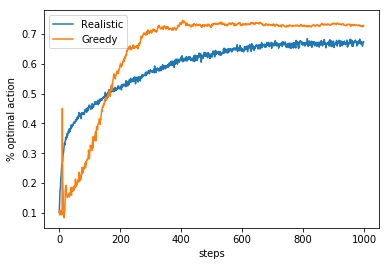

In [5]:
import numpy as np
import matplotlib.pyplot as plt

num_arms = 10
# fig, axs = plt.subplots(2)

def run_real(q_t, epsilon, episodes):
    optimal_actions = np.argmax(q_t)
    action_counts = np.zeros(num_arms)
    q_pred = np.zeros(num_arms)

    episode_rewards = []
    q_true = q_t
    opt_action_cnt = []
    for eps in range(episodes):
        
        if np.random.random() < epsilon:
            action_index = np.random.randint(num_arms)
        else:
            greedy = np.argmax(q_pred)
            actions = np.where(q_pred == np.argmax(q_pred))[0]
            
            if len(actions) == 0:
                action_index = greedy
            else:
                action_index = np.random.choice(actions)
        if epsilon == 0:
            action_index = np.argmax(q_pred)
        if action_index == optimal_actions:
            opt_action_cnt.append(1)
        else:opt_action_cnt.append(0)
        reward = np.random.normal(q_true[action_index])
        
        action_counts[action_index] += 1
#         alpha = 1 / action_counts[action_index]
        alpha = 0.1
        q_pred[action_index] = q_pred[action_index] +\
                        alpha * (reward-q_pred[action_index])
        
        episode_rewards.append(reward)
        q_true += np.random.normal(0.0, 0.01, num_arms)
    return episode_rewards, opt_action_cnt

def run_greedy(q_t, episodes):
    optimal_actions = np.argmax(q_t)
    action_counts = np.zeros(num_arms)
    q_pred = np.zeros(num_arms) + 5.

    episode_rewards = []
    q_true = q_t
    opt_action_cnt = []
    for eps in range(episodes):
    
     
        action_index = np.argmax(q_pred)
        if action_index == optimal_actions:
            opt_action_cnt.append(1)
        else:opt_action_cnt.append(0)
        reward = np.random.normal(q_true[action_index])
        
        action_counts[action_index] += 1
#         alpha = 1 / action_counts[action_index]
        alpha = 0.1
        q_pred[action_index] = q_pred[action_index] +\
                        alpha * (reward-q_pred[action_index])
        
        episode_rewards.append(reward)
        q_true += np.random.normal(0.0, 0.01, num_arms)
    return episode_rewards, opt_action_cnt

def rung():
    num_bandits = 2000
    num_episodes = 1000
    num_arms = 10
    realistic_rew = []
    realistic_cnt = []

    optimistic_cnt = []
    optimistic_rew = []


    episode_rew = np.zeros(num_episodes)
    opt_ac_cnt = np.zeros(num_episodes)
    for i in range(num_bandits):
        q_true = np.random.normal(0.0, 1.0, num_arms)   
        # print(q_true.shape)
        # q_true = np.zeros(num_arms)
        if i % 100 == 0:
            print('iteration : ', i)
    #             if eps == 'optimistic':
    #                 q_true == q_true + 5.0
        ep_rew, opt_ac = run_greedy(q_true,  num_episodes)
        episode_rew += np.array(ep_rew)
        opt_ac_cnt += opt_ac

    avg_rew = episode_rew / num_bandits
    avg_cnt = opt_ac_cnt / num_bandits

    return avg_rew, avg_cnt

def runr():
    num_bandits = 2000
    num_episodes = 1000
    num_arms = 10
    realistic_rew = []
    realistic_cnt = []

    optimistic_cnt = []
    optimistic_rew = []


    episode_rew = np.zeros(num_episodes)
    opt_ac_cnt = np.zeros(num_episodes)
    for i in range(num_bandits):
        q_true = np.random.normal(0.0, 1.0, num_arms)
        # q_true = np.zeros(num_arms)
        if i % 100 == 0:
            print('iteration : ', i)
    #             if eps == 'optimistic':
    #                 q_true == q_true + 5.0
        ep_rew, opt_ac = run_real(q_true, 0.1 ,num_episodes)
        episode_rew += np.array(ep_rew)
        opt_ac_cnt += opt_ac

    avg_rew = episode_rew / num_bandits
    avg_cnt = opt_ac_cnt / num_bandits

    return avg_rew, avg_cnt



real_rew, real_cnt = runr()

greedy_rew, greedy_cnt = rung()


plt.plot(real_cnt, label='Realistic')
plt.plot(greedy_cnt, label='Greedy')
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()
